In [1]:
import utilities
import os


Drawing peg0.peggle
output/peg0.peggle
Drawing peg1.peggle
output/peg1.peggle
Drawing peg2.peggle
output/peg2.peggle
Drawing peg3.peggle
output/peg3.peggle
Drawing peg4.peggle
output/peg4.peggle
Drawing peg5.peggle
output/peg5.peggle


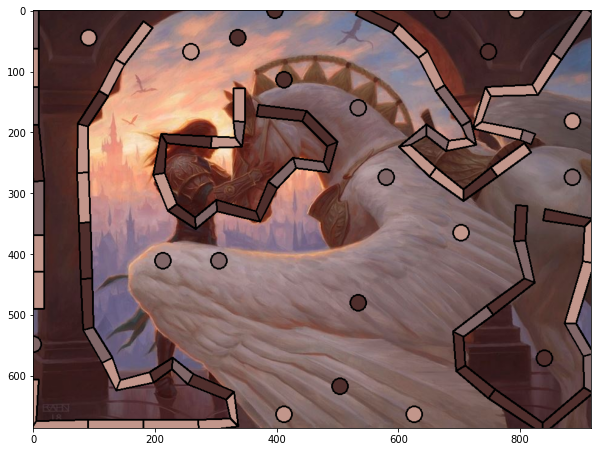

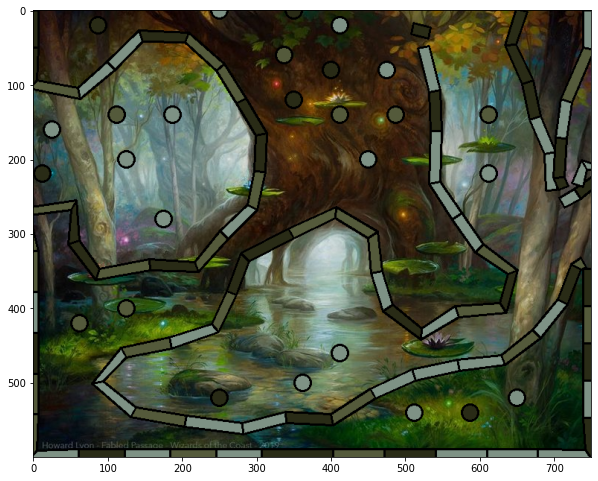

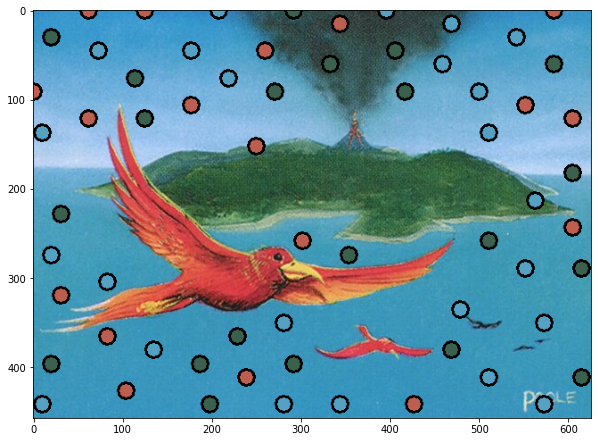

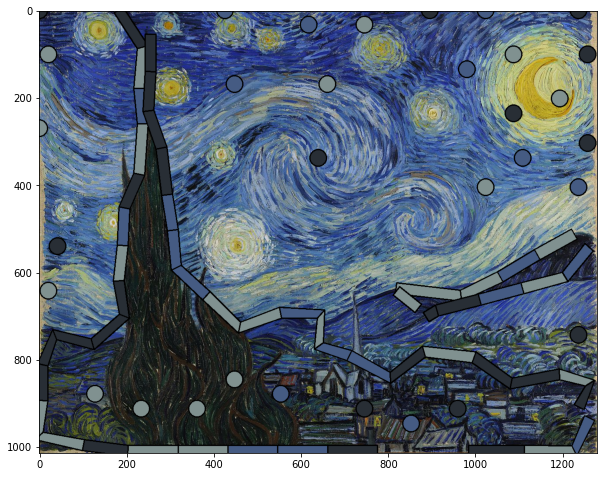

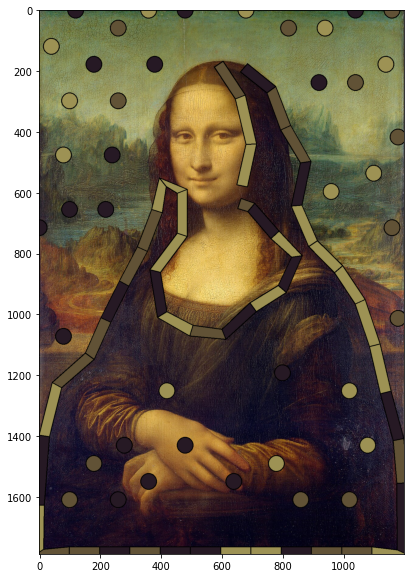

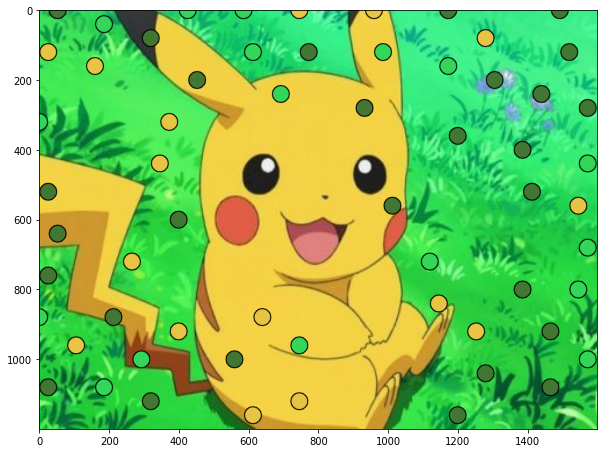

In [2]:
root_peg_width = .01

# list all files in the output folder
files = os.listdir('output')

for file in files:
  if file.endswith('.peggle'):
    print('Drawing', file)
    utilities.draw_level('output/' + file, root_peg_width)

